
# Measuring the illuminance of a light bulb as a function of distance source-detector
designed and developed by Eugenio Tufino and Micol Alemani

We describe here the data analysis of a simple experiment realized with a light bulb and the light sensor of a smartphone. In this experiment the illuminance of the light bulb is measured as a function of the distance between the light bulb and the measuring sensor.
We will make the following assumptions for modeling (i.e. describing in a simple way) our systems:
- the light source is a point source
- the light sensor is measuring a voltage. This voltage is linear proportional to the light intensity (i.e. if we change the light intensity the voltage changes linearly with this).

In [1]:
# First we import the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
# Here we set the figures parameters (once -at the beginning- for the whole Notebook)

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

**Important! **

Regardless if you are using Jupiter Lab on Anaconda or Google Colab, we are loading the data file on Github repository, this method is the most straightforward and works in both configurations!

If in your activities you need to load a data file on your hard disk follow the instructions in the "Introduction to Jupiter Notebook Import Data Files" or the example in the notebook "Example of moving average applied to sunspots number".

In [ ]:
#from google.colab import drive  # to comunicate with google drive

#drive.mount('/content/drive/', force_remount=True)

In [3]:
# url of the data file on the github repository
githuburl='https://raw.githubusercontent.com/etufino/Jupyter-Notebooks-in-Lab-Course-in-Potsdam/main/illuminancevsdistancewithpandas%20.csv'

In the picture below, you can see the experimental set up. The experiment was done as home experiment during the first Pandemic period. It consists of a bright light bulb (in the picture behind) and the light sensor of a smartphone (in the picture in front). 

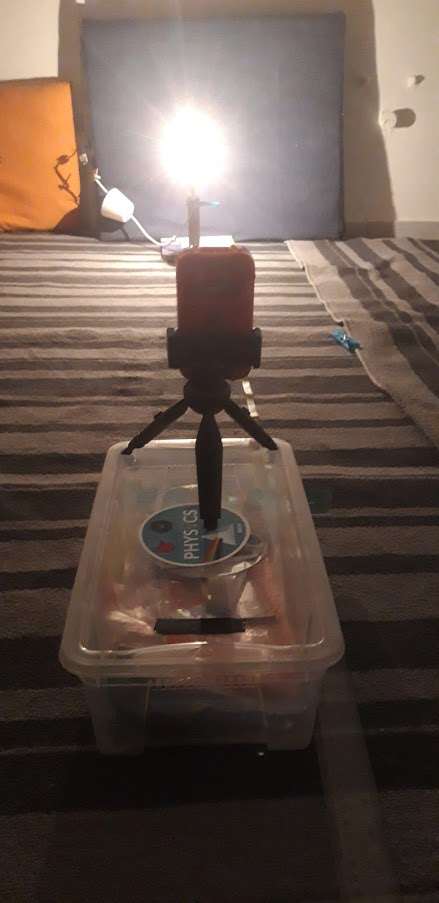

## Loading and "cleaning" the data file
Before uploading the data we have to check how the data values are separated. By opening the file with a text editor, we found that our file contains tab-separated values. Therefore we add the option "\t" when importing the data using pandas. In fact by default Pandas has ',' as separator.


In [4]:
df=pd.read_csv(githuburl, sep="\t")   # the option \t specifies that the data in the file are tab-separated values.

In [5]:
#df.head() # with df.head() you can see the first rows of the dataframe
df.tail()  #with df.tail() you can inspect the last rows of the dataframe

,Distance(m),Illuminance(lux)
35,1.30,18.0
36,1.35,15.0
37,1.40,16.0
38,1.45,13.0
39,1.50,13.0


In [6]:
df.columns  # to check the exact names of columns

Index(['Distance(m)', 'Illuminance(lux)'], dtype='object')

### Assign to x and y the columns data we want to use:


In [7]:
x_data=df["Distance(m)"] # distance in meter
y_data=df["Illuminance(lux)"]  # illuminance in lux

In the case you open the file and find in the last rows 'NaN' (Not A Number) values, it means for Python that values are missing. To select only a subinterval of the data, you can use the sliding syntax. For example to select only the first 40 values you can write: 

In [ ]:
#x_data=df["Distance(m)"][0:39] 
#y_data=df["Illuminance(lux)"][0:39] 

### Plot of experimental data

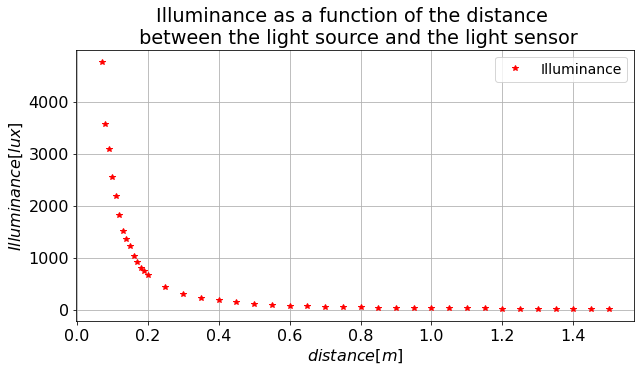

In [8]:
plt.plot(x_data,y_data, 'r*',label="Illuminance")  
plt.title("Illuminance as a function of the distance \n between the light source and the light sensor")
plt.xlabel(r'$distance[m]$')
plt.ylabel(r'$Illuminance [lux]$')
plt.legend()
#plt.savefig("graph of illuminance.jpg")  # To save the plot in .jpg format
plt.grid()
plt.show()

# Modeling the illuminance as a function of distance

We decide here to test if we can apply the model of a point light source to describe our experimental data. This model predicts that the illuminance $E_v$ decreases with increasing distance and is proportional to $1/d^2$.
To check this relationship between $E_v$ and $1/d^2$ we do a linearization and plot $E_v$ as a function of $1/d^2$.
In the following we create a new data frame and plot the data using the new axis for the linearization.


In [ ]:
new_variable_x= 1/x_data**2  # new variable x

In the following cell code we do the new plot:

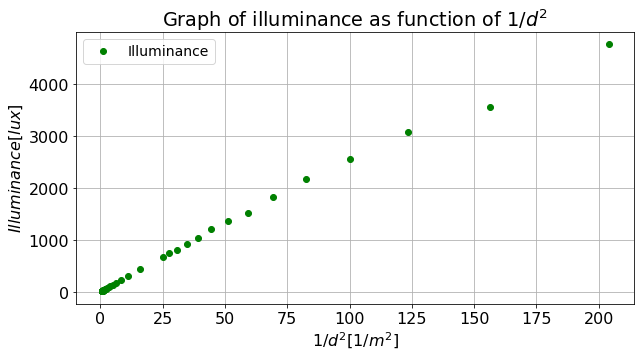

In [ ]:
plt.plot(new_variable_x,y_data, 'go',label="Illuminance")  
plt.title("Graph of illuminance as function of $1/d^2$")
plt.xlabel(r'$1/d^2[1/m^2]$')
plt.ylabel(r'$Illuminance [lux]$')
plt.legend()
#plt.savefig("graph illuminancevsInversesquare.jpg")
plt.grid()
plt.show()

### You can create a dataframe with the new x variable we introduced and  export it as .csv file.

In [ ]:
dftoexport = pd.DataFrame({'1/d^2': new_variable_x, 'Illuminance': y_data})
dftoexport.to_csv('datafile_illuminance_linear.csv',sep ='\t',index=False)

to do the same operation with Google Colab delete the '#' in the following code:

In [ ]:
#from google.colab import files  # this import is needed only if you use Google Colab
#files.download('datafile_illuminance_linear.csv')  

## Define the linear function of best fit


In [ ]:
def test_func1(x,b,a):
    return b*x+a # linear fit

### We will use the curve_fit function of the scipy package (see the related notebook used during the laboratory course)

In [ ]:
# Fit the data with first test function
params, params_covariance = curve_fit(test_func1, new_variable_x, y_data) 
print("The calculated parameters of the fit of the function test_func1 (without units :-()) are",params)

The calculated parameters of the fit of the function test_func1 (without units :-()) are [23.92736207 37.46910751]


In [ ]:
# Calculation of r^2

residuals = y_data- test_func1(new_variable_x, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print ("r^2=",r_squared)


r^2= 0.9959440724071011


We print now the fit paramenters with units :-):

In [ ]:
# here we print the parameter slope and intercept for the linear fit with their units
slope = params[0]  # slope
inter = params[1]  # intercept
print("intercept={:3.2f} lux".format(inter))
print("slope={:3.2f} lux*m^2".format(slope))

intercept=37.47 lux
slope=23.93 lux*m^2


In [ ]:
# here we print the uncertainties of the parameter slope and intercept
u_slope = np.sqrt(params_covariance [0][0])  # assign the 11 term of the covariance matrix to theuncertainty of the slope
u_inter = np.sqrt(params_covariance [1][1])  # assign the 00 term of the covariance matrix to the uncertainty of the intercept
print("uncertainty intercept={:3.0f} lux".format(u_inter))
print("uncertainty slope={:4.2f} lux*m^2".format(u_slope))


uncertainty intercept= 13 lux
uncertainty slope=0.25 lux*m^2


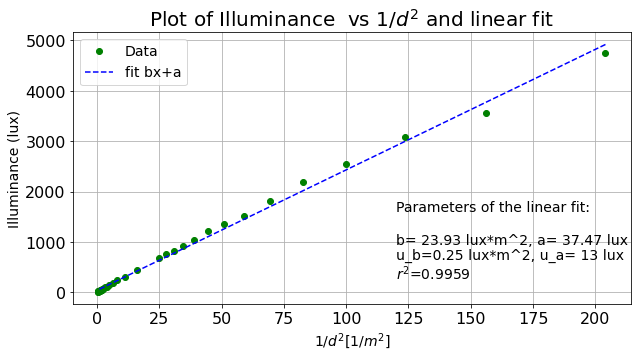

In [ ]:
# here we plot the data and the linear fit
plt.figure(figsize=(10, 5))
plt.plot(new_variable_x, y_data, 'go',label='Data')
plt.plot(new_variable_x, test_func1(new_variable_x, *params),'b--',
         label='fit bx+a')
plt.grid('on')
plt.title('Plot of Illuminance  vs $1/d^2$ and linear fit',fontsize=20)
plt.xlabel(r'$1/d^2 [1/m^2]$',fontsize=14)
plt.ylabel('Illuminance (lux)',fontsize=14)
plt.text(120,1600,'Parameters of the linear fit:',fontsize=14)

plt.text(120,950,'b={:6.2f} lux*m^2, a={:6.2f} lux'.format(params[0],params[1]),fontsize=14)   # this way we print the fit parameters in the graph
plt.text(120,650,'u_b={:4.2f} lux*m^2, u_a={:3.0f} lux'.format(u_slope,u_inter),fontsize=14)   # this way we print the uncertainties of fit parameters in the graph
plt.text(120,250,'$r^2$={:6.4f}'.format(r_squared),fontsize=14)  # we print r^2 int he graph
plt.legend()
#plt.savefig("grafico illuminance and fit linear.jpg")
plt.show()


**Comment:** A more advanced method is to put the function definitions we have introduced into a .py file and then import it with the **import**, in the same way we did with functions in numpy, scipy, etc. See, for example, here for further details: [link](https://docs.python.org/3/tutorial/modules.html)

### Log-Log representation
If both the vertical and horizontal axes of a plot are scaled logarithmically, the plot is referred to as a log–log plot. Logarithmic scales are used when we want to show 'data that change fast'.
An introduction to logaritmic graphs can be find [here](https://en.wikipedia.org/wiki/Logarithmic_scale).

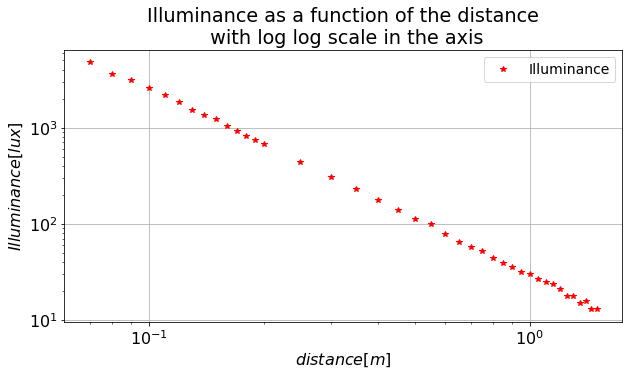

In [ ]:
#Here we plot the data with a logarithmic scale
plt.plot(x_data,y_data, 'r*',label="Illuminance")  
plt.title("Illuminance as a function of the distance\n with log log scale in the axis")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$distance[m]$')
plt.ylabel(r'$Illuminance [lux]$')
plt.legend()
#plt.savefig("graph illuminancelog.jpg")  # To save the plot in .jpg format
plt.grid()
plt.show()

Now instead of just representing the data using a Log-Log scale, we would like here to change the axis into 'Logarithm of Illuminace' (natural logarithm -ln) and 'Logarithm of Distance' (natural logarithm -ln). This way we can do a linear fit of the data (with the new logarithmic axes) and get information of the exponent relating the Illuminace and the Distance.
We do this in the the following code:

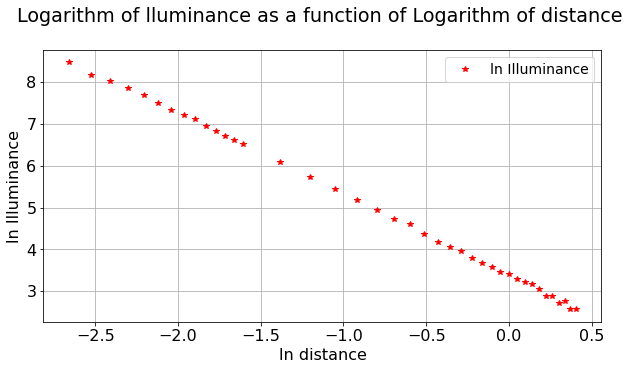

In [ ]:
plt.plot(np.log(x_data),np.log(y_data), 'r*',label="ln Illuminance")  
plt.title("Logarithm of lluminance as a function of Logarithm of distance \n")
plt.xlabel('ln distance')
plt.ylabel('ln Illuminance')
plt.legend()
#plt.savefig(" graph illuminance.jpg")  # To save the plot in .jpg format
plt.grid()
plt.show()

## Prediction:
By doing this change of axis and plotting the 'ln illuminace' as a function of the 'ln distance' we expect (using our model that the illuminace is proportional to $1/d^2$) to obtain a line with slope 2.
We fit here the data with a linear model:

In [ ]:
# Fit the data with first test function
params, params_covariance = curve_fit(test_func1, np.log(x_data),np.log(y_data)) 

In [ ]:
print("The calculated parameters of the fit of the function test_func1 ",params)

The calculated parameters of the fit of the function test_func1  [-1.93960919  3.37792454]


In [ ]:
# here we print the parameter slope and intercept for the linear fit
slope = params[0]  # slope
inter = params[1]  # intercept
print("intercept={:3.2f}".format(inter))
print("slope={:3.2f}".format(slope))

intercept=3.38
slope=-1.94


In [ ]:
# here we print the uncertainties of the parameter slope and intercept
u_slope = np.sqrt(params_covariance [0][0])  # assign the 11 term of the covariance matrix to theuncertainty of the slope
u_inter = np.sqrt(params_covariance [1][1])  # assign the 00 term of the covariance matrix to the uncertainty of the intercept
print("uncertainty intercept={:3.2f}".format(u_inter))
print("uncertainty slope={:5.2f}".format(u_slope))


uncertainty intercept=0.01
uncertainty slope= 0.01


### Discussion
The slope estimation from the 'ln-ln' plot shows that the exponent is within a strandard uncertainty different than the expected value of two. Such a result means that either our model does not fit the data or viceversa our experiment is not appropaite to use our model. In particular the reason for this discrepancy could be of four different origins:

$(i)$ the **physical system** (i.e. the light source) is not ok for using the model we are using. For example we choose a light source that is **not a point source**, therefore we cannot use the model (see assumptions at the beginning of this notebook).

or


$(ii)$ the **measurement system** (here the measurement system is the light sensor) is not ok for using our model of the sensor. For example we choose a light sensor that is measuring the light intensity **not in a linear manner** (see assumptions at the beginning of this notebook).

or

$(iii)$ the **model of the physical system** studied is not good to describe our experimental data well (for example the assumption that the light source is a point source is not applicable in our case) 

or

$(iv)$ the **model of the measurement system** studied is not ok to describe our experiment. For example the assumption that sensor is measuring the light intensity in a linear manner is not applicable in our case.




These 4 options are quite typical for each experiments. Notice that during an experiment one will decides to consider either to revise the used **models** (options $iii$ or $iv$) or to change the **systems** (options $i$ or $ii$) depending on what one wants to do. In fact, one may want either to reproduce an experiment that is described by a well defined model or one may want to find a good model that describe an experiment.

We will work on integrating working on the fours options above in the second semester. For this we will use a framework that describes how experiments work. This is called the 'Modeling Framework for Experimental Physics'. It was develop by H.J. Lewandowski and collegues at the University of Colorado Boulder. 

Based on the goal of the experiment one decides to consider option $i$ to $iv$ and either revise the models or make changes on the systems. This will require several iterations on the experiment or of the experimental analysis. This is will be the goal of next semester. We stop for now here.